In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)

print("Libraries imported successfully")



Libraries imported successfully


In [2]:
df = pd.read_csv("../data/churn.csv")

print("Dataset shape:", df.shape)
df.head()



Dataset shape: (7043, 12)


,customerID,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   Contract          7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 660.4+ KB


In [4]:
df.isnull().sum()


customerID          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check again
df['TotalCharges'].dtype


dtype('float64')

In [6]:
df.isnull().sum()


customerID           0
tenure               0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
Contract             0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [8]:
df.drop('customerID', axis=1, inplace=True)
df.head()


,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.50,No
2,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [9]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

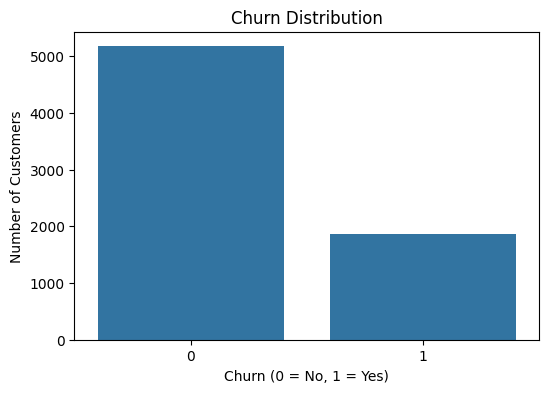

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


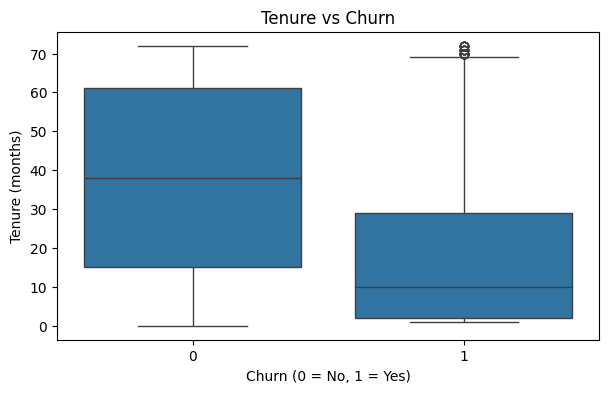

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (months)')
plt.show()


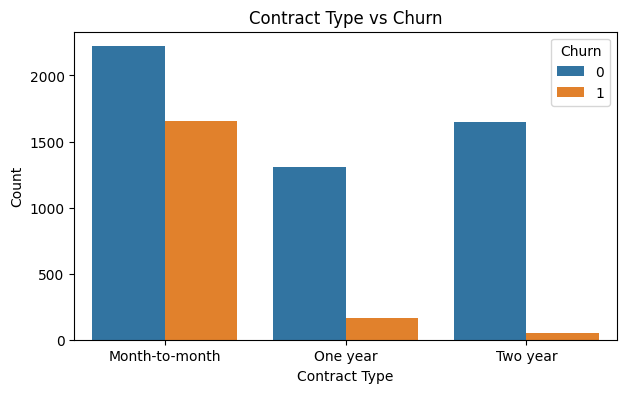

In [12]:
plt.figure(figsize=(7,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type vs Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


### Summary of Findings Based on Exploratory Data Analysis

- The dataset is comprised of 7,043 customers that have been completely cleaned of any missing values.
- Customer retention versus loss is imbalanced; there are significantly more retained customers than customers who have ceased being customers. 
- Customer with fewer months of tenure as a customer are more likely to churn.
- Month to month contracts have the highest percentage of churn rates. 
- Long-term contracts have statistically the lowest rate of churn.